### 1. Load feature vectors from dataset

In [ ]:
import os
import cv2
from detection import detect_face_for_testing
from feature_extraction import extract_feature, init_facenet

DATASET_PATH = "test_images_FEI"
REF_IMG_INDEX = 11 # The index for the reference images in a particular dataset
                   # FEI -> 11

recognition_model = init_facenet()

ref_feat_vect_dict = {} # Dictionary to store the reference feature vector for each person
feat_vect_dict = {} # Dictionary to store the rest of the feature vectors for each person

j = 0

for person in os.listdir(DATASET_PATH):
    person_path = os.path.join(DATASET_PATH, person)

    feat_vect_dict[person] = []

    j += 1

    for i, img_name in enumerate(os.listdir(person_path)):
        img_path = os.path.join(person_path, img_name)
        img_array = cv2.imread(img_path)
        face_data, _, image_rgb = detect_face_for_testing(img_array)
        
        
        if face_data is not None:
            feature_vector = extract_feature(face_data, image_rgb, recognition_model)

            if i == REF_IMG_INDEX:
                ref_feat_vect_dict[person] = feature_vector # Add reference feature vector to its corresponding person
            else:
                feat_vect_dict[person].append(feature_vector) # Add feature vector to its corresponding person
        else:
            print("No face detected: ")
            
    if j > 10: # To ensure not loading the entire dataset when testing the basic test functionality
        break

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━

### 2. Create test cases

In [ ]:
import random
from itertools import combinations

# Create positive test for each person cases by matching the reference image with each of the other images
pos_test_cases = []

for person, feature_vectors in feat_vect_dict.items():
    ref_feat_vect = ref_feat_vect_dict.get(person)

    for i in range(len(feature_vectors)):
        feat_vect = feature_vectors[i]
        pos_test_cases.append((ref_feat_vect, feat_vect, True, person, person)) # Add test case consisting of the feature vectors that are to be compared and the expected value

# Create negative tests by randomly matching non-identical reference images. Should constitute 20% of the total test cases
num_of_neg_tests = int(len(pos_test_cases)/4)

neg_pairs = list(combinations(ref_feat_vect_dict.items(), 2))
neg_pairs = neg_pairs[:num_of_neg_tests]
neg_test_cases = [(ref_feat_vect1, ref_feat_vect2, False, person1, person2) for (person1, ref_feat_vect1), (person2, ref_feat_vect2) in neg_pairs]
random.shuffle(neg_test_cases)

# Combine the test cases
all_test_cases = pos_test_cases + neg_test_cases



### 3. Evaluate the test cases

Incorrect prediction for persons 1 and 1
Incorrect prediction for persons 10 and 10
Incorrect prediction for persons 100 and 100
Incorrect prediction for persons 102 and 102
Incorrect prediction for persons 103 and 103
Incorrect prediction for persons 104 and 104
Incorrect prediction for persons 105 and 105
Incorrect prediction for persons 106 and 106
Incorrect prediction for persons 106 and 106
Incorrect prediction for persons 106 and 106
Incorrect prediction for persons 106 and 106
Accuracy: 0.9375, Precision: 1.0000, Recall: 0.9220, F1-score: 0.9594


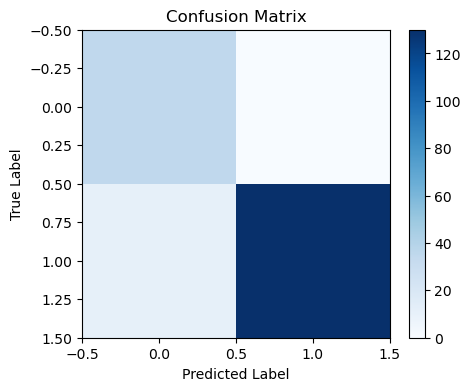

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from verification import compare_faces_euclidean

y_true = [test_case[2] for test_case in all_test_cases] # Create list consisting of the correct classifiers
y_pred = []

# Test the verification functionality on each test case pair 
for f_vect_1, f_vect_2, has_same_face, p1, p2 in all_test_cases:
    prediction = compare_faces_euclidean(f_vect_1, f_vect_2) #prediction, distance = compare_faces_euclidean(f_vect_1, f_vect_2)
    y_pred.append(prediction)
    if prediction == has_same_face:
        pass
    else:
        print(f'Incorrect prediction for persons {p1} and {p2}')

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Ploting
plt.figure(figsize=(5, 4))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.colorbar()

# Labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

plt.show()